In [381]:
# Import libraries
import numpy as np  # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization
%matplotlib inline

This dataset contains information about expensis and profits of 50 startup companies in different states of the US along with the amount spent on research and development, administration, and marketing. The dataset has 50 rows and 5 columns. Each row represents a different time period in which the company's profit and expenses were recorded. The columns are:

* **Date:** The date on which the profit and expenses were recorded (Please note that the date used here is for illustrative purposes only and does not reflect the actual date on which the transactions occurred.)

* **R&D Spend:** The amount of money spent on research and development.

* **Administration:** The amount of money spent on administration.

* **Marketing Spend:** The amount of money spent on marketing.

* **State:** The state in which the company operates.

* **Profit:** The amount of profit made by the company during that period.

In [383]:
# Reads the CSV file containing data on 50 startups
df = pd.read_csv("50_Startups.csv")

In [384]:
# Inspecting the first five rows of data
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [385]:
# Inspecting the last five rows of the data 
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [386]:
# Get the shape of the data
df.shape

(50, 5)

In [387]:
# Get informations about entire data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [388]:
# Get information about the data
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [389]:
# Get the column names 
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [390]:
# Informations on descriptive statistics
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.62,45902.26,0.00,39936.37,73051.08,101602.80,165349.20
Administration,50.0,121344.64,28017.80,51283.14,103730.88,122699.80,144842.18,182645.56
Marketing Spend,50.0,211025.10,122290.31,0.00,129300.13,212716.24,299469.08,471784.10
Profit,50.0,112012.64,40306.18,14681.40,90138.90,107978.19,139765.98,192261.83


In [391]:
# Get information about the state column
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [392]:
# Create a random date for our analysis
start_date = '2018-01-01'
num_periods = len(df) 

# Generate the monthly date range using pandas.date_range()
date_range = pd.date_range(start=start_date, periods=num_periods, freq='M')

# Add the 'date' column to the 'tips' DataFrame.
df['date'] = date_range


In [393]:
# Set style 
sns.set_style("whitegrid")

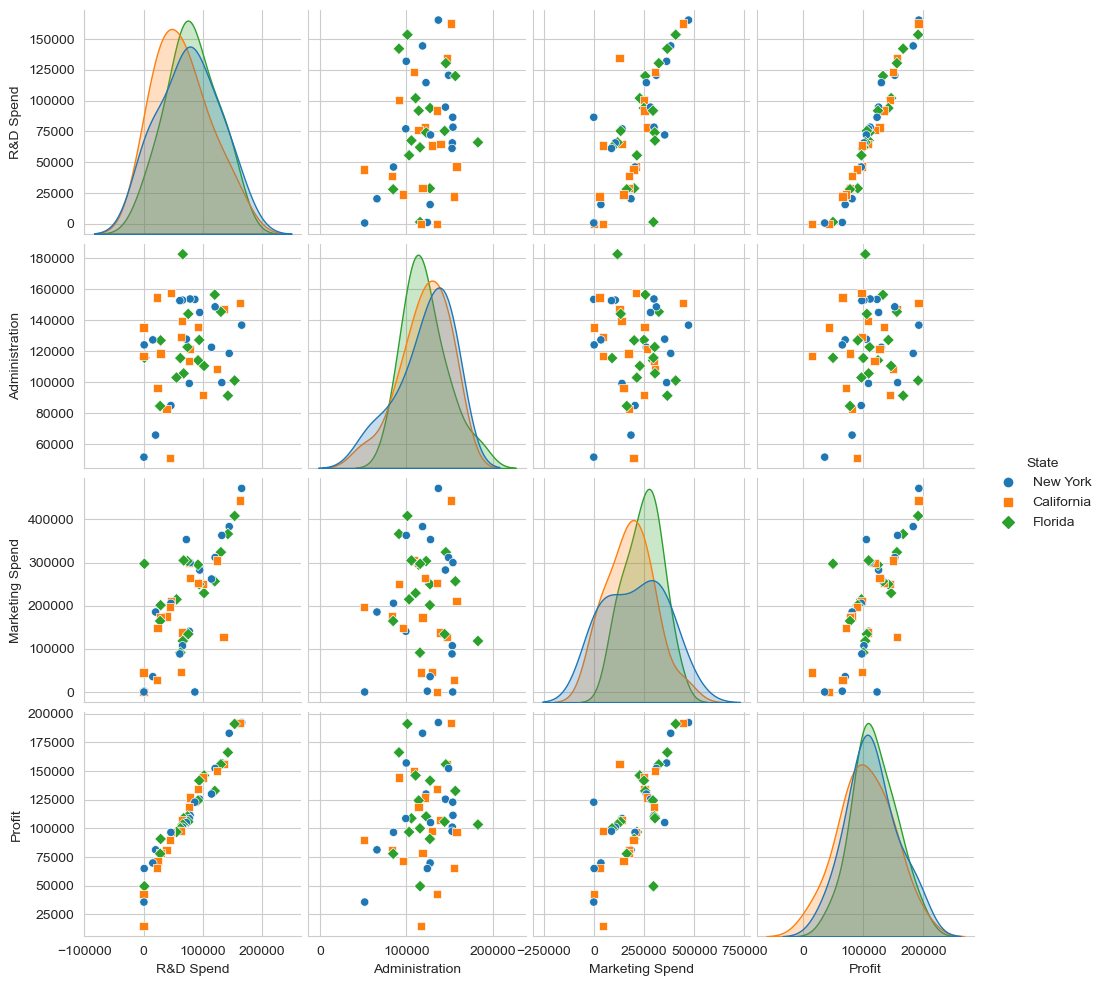

In [394]:
# Plot a pairplot to see relation
sns.pairplot(df, hue='State', markers=["o", "s", "D"])
plt.show()

* R&D and Profit has positive correlation.
* No correlation between Profit and Administration.
* High correlation between Profit and Marketing Spend.


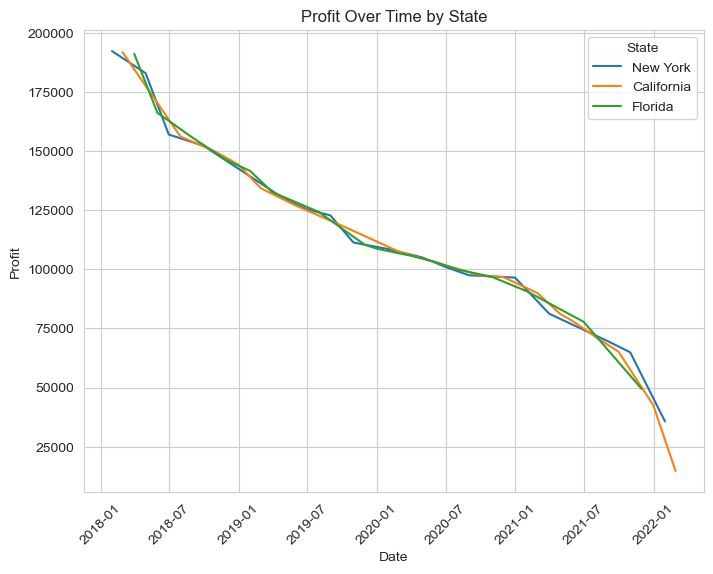

In [395]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x= 'date', y = 'Profit', hue='State')
plt.xlabel('Date')
plt.title('Profit Over Time by State')
plt.xticks(rotation=45)
plt.show()

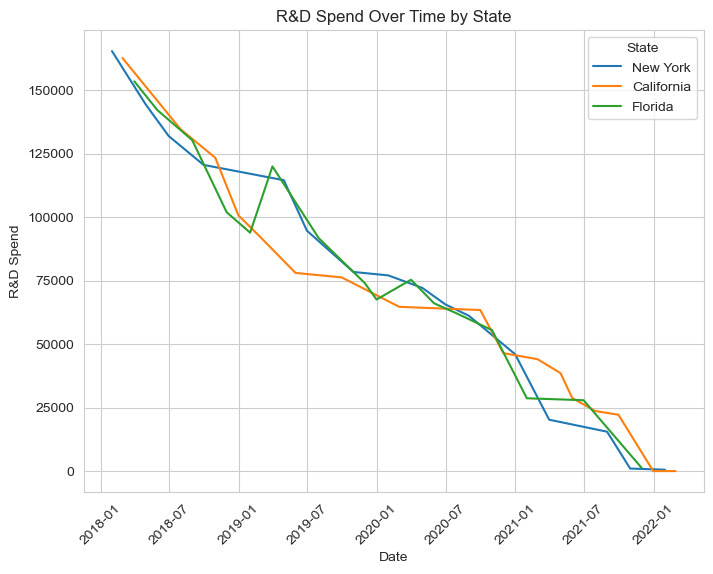

In [396]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x= 'date', y = 'R&D Spend', hue = 'State')
plt.xlabel('Date')
plt.title('R&D Spend Over Time by State')
plt.xticks(rotation=45)
plt.show()

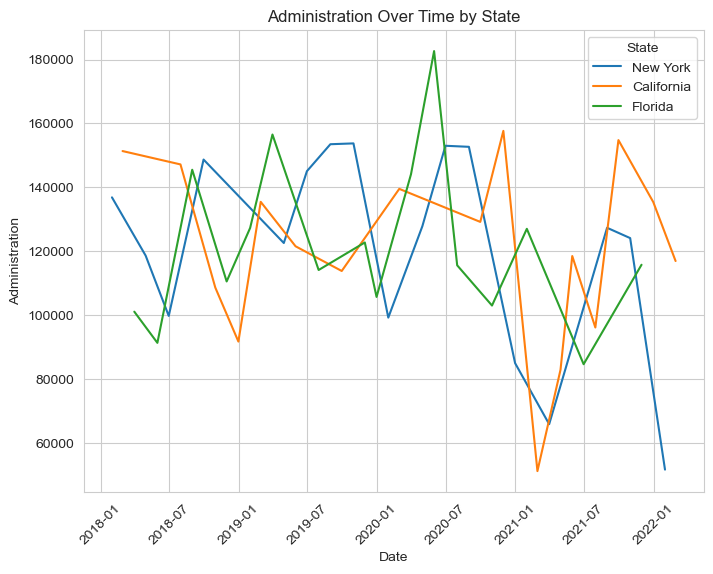

In [397]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x= 'date', y = 'Administration', hue = 'State')
plt.xlabel('Date')
plt.title('Administration Over Time by State')
plt.xticks(rotation=45)
plt.show()

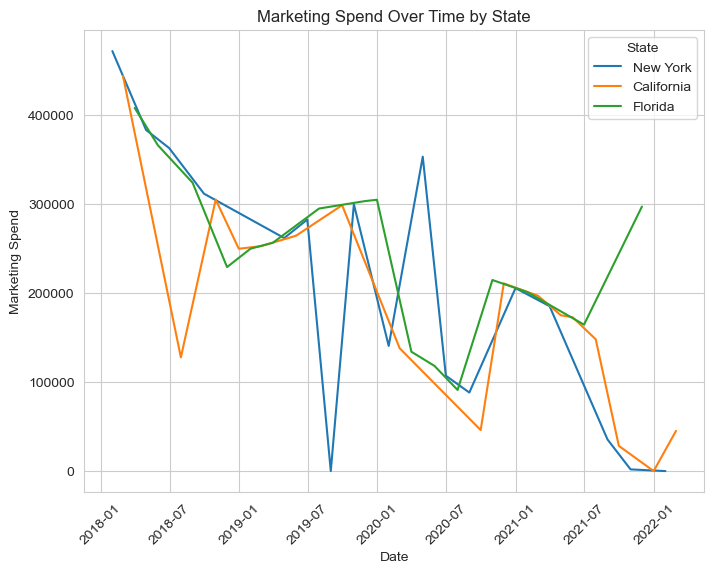

In [398]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x= 'date', y = 'Marketing Spend', hue = 'State')
plt.xlabel('Date')
plt.title('Marketing Spend Over Time by State')
plt.xticks(rotation=45)
plt.show()

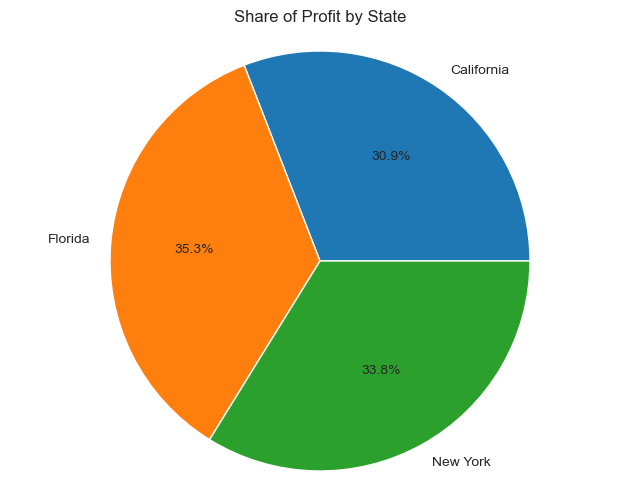

In [399]:
# Group by 'State' column and calculate the mean profit for each group
df_state = df.groupby('State')['Profit'].mean()
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(df_state, labels=df_state.index, autopct='%1.1f%%')
plt.title('Share of Profit by State')
plt.axis('equal')
plt.show()

Florida has the highest average profit percentage, accounting for 35.3% of the total average profit. New York has the second-highest average profit percentage, accounting for 33.8% of the total average profit. Finally, California has the lowest average profit percentage of the three states, accounting for 30.9% of the total average profit. Overall, this result shows that businesses located in Florida tend to generate a larger share of the total profit on average compared to businesses in New York or California.

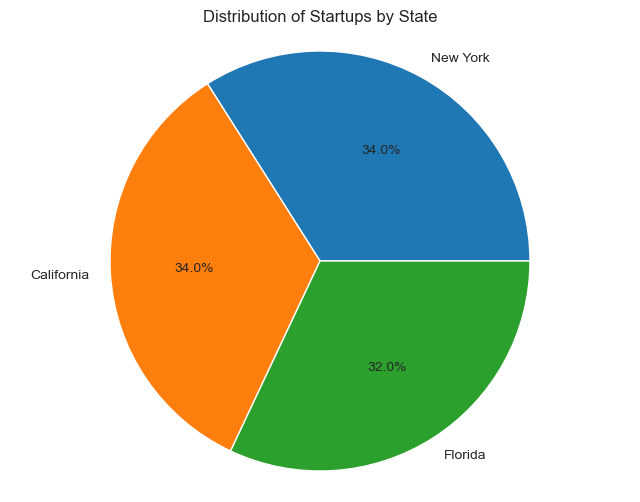

In [400]:
# Get the counts of each state
state_counts = df['State'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Startups by State')
plt.axis('equal') 
plt.show()

In [401]:
# Group by 'State' column and calculate the mean Expenses for each group
df_expenses = df.groupby('State')[['R&D Spend', 'Administration', 'Marketing Spend', 'State']].mean().reset_index().round(2)

#View df_state' DataFrame
df_expenses


,State,R&D Spend,Administration,Marketing Spend
0,California,64657.67,120746.51,182540.93
1,Florida,80724.02,121768.90,247323.55
2,New York,76195.06,121543.47,205346.02


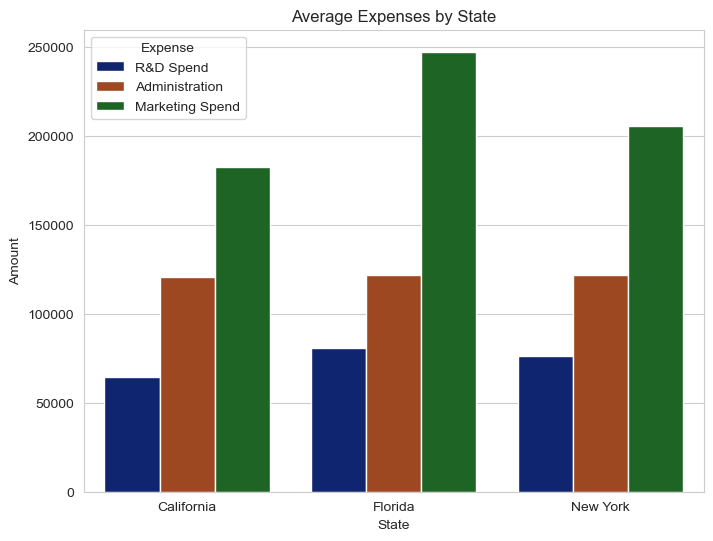

In [402]:
# Melt the DataFrame to convert the columns into a "variable" column
df_expenses_melted = df_expenses.melt(id_vars='State', var_name='Expense', value_name='Amount')

# Create the bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=df_expenses_melted, x='State', y='Amount', hue='Expense', palette='dark')
plt.title('Average Expenses by State')
plt.xlabel('State')
plt.ylabel('Amount')
plt.legend(title='Expense', loc='upper left')
plt.show()

The graph shows the average spending on R&D, administration, and marketing for three states: California, Florida, and New York.In California, the average spending on R&D is 64,657.67, on administration is 120,746.51, and on marketing is 182,540.93. In Florida, the corresponding averages are 80,724.02 for R&D, 121,768.90 for administration, and 247,323.55 for marketing. In New York, the average spending is 76,195.06 for R&D, 121,543.47 for administration, and 205,346.02 for marketing. The graph reveals that, on average, the highest spending among the three states is on marketing, followed by administration and R&D.

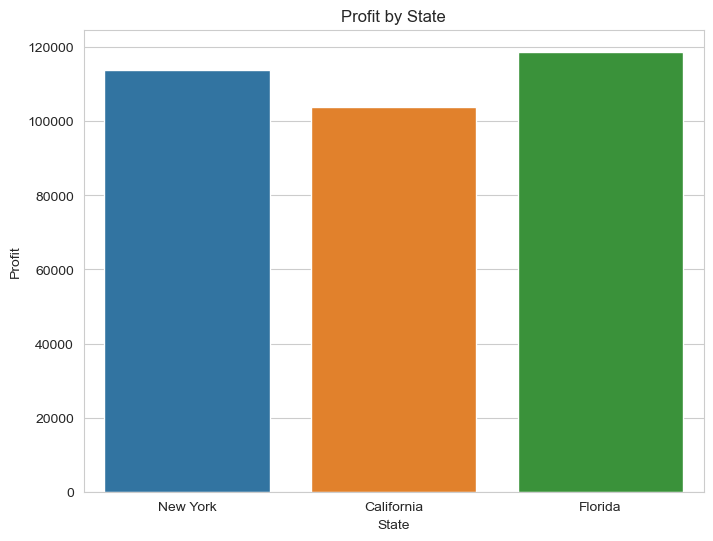

In [403]:
# Barplot 
plt.figure(figsize=(8, 6))
sns.barplot(data = df, y = 'Profit', x = 'State', ci = False)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Profit by State')
plt.show()

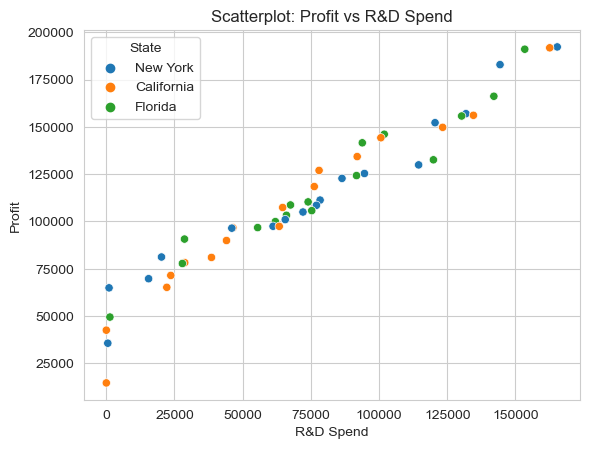

In [404]:
sns.scatterplot(data = df, x="R&D Spend", y="Profit", hue = 'State')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('Scatterplot: Profit vs R&D Spend')
plt.show()       

* Positve correlation between R&D spend and Profit as showns in the scatter plot

In [405]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit,date
0,165349.2,136897.80,471784.10,New York,192261.83,2018-01-31
1,162597.7,151377.59,443898.53,California,191792.06,2018-02-28


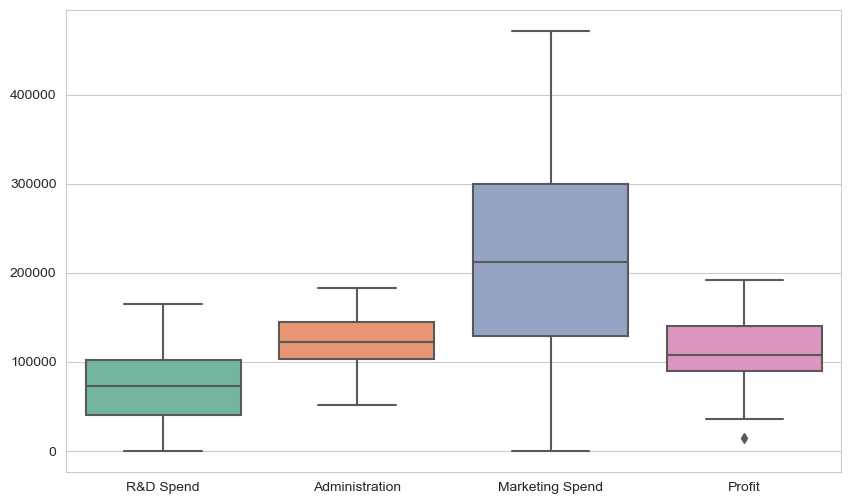

In [406]:
# plot boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette='Set2')
plt.show()

* There is some outlier values in profit

In [407]:
# Remove outlier

Q1 = df.Profit.quantile(0.25)    # lower quartile
Q3 = df.Profit.quantile(0.75)    # upper quartile

IQR = Q3 - Q1     # interquartile range
df = df[(df.Profit >= Q1 - 1.5*IQR) & (df.Profit <= Q3 + 1.5*IQR)]

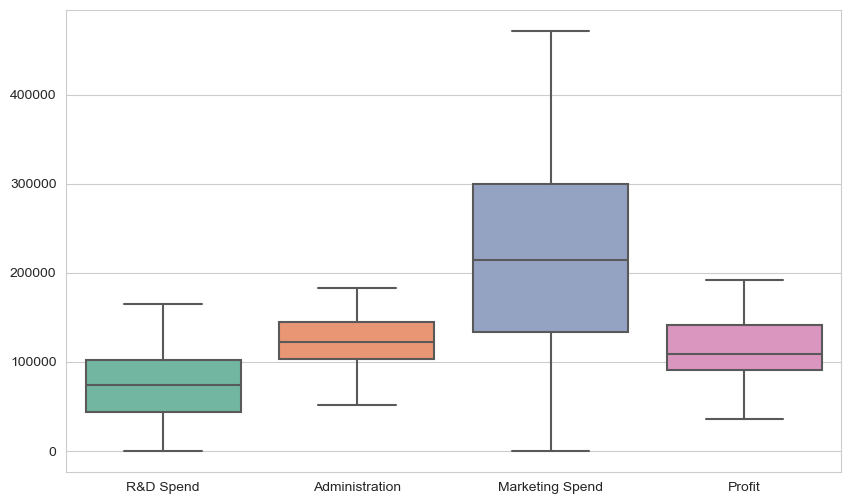

In [408]:
# plot boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette='Set2')
plt.show()

* No outlier

In [409]:
# Melt the DataFrame to convert the columns into a "variable" column
data_melted = df.melt(id_vars=['State', 'date', 'Profit'], var_name='Expense', value_name='Amount')

In [410]:
data_melted.head()

,State,date,Profit,Expense,Amount
0,New York,2018-01-31,192261.83,R&D Spend,165349.20
1,California,2018-02-28,191792.06,R&D Spend,162597.70
2,Florida,2018-03-31,191050.39,R&D Spend,153441.51
3,New York,2018-04-30,182901.99,R&D Spend,144372.41
4,Florida,2018-05-31,166187.94,R&D Spend,142107.34


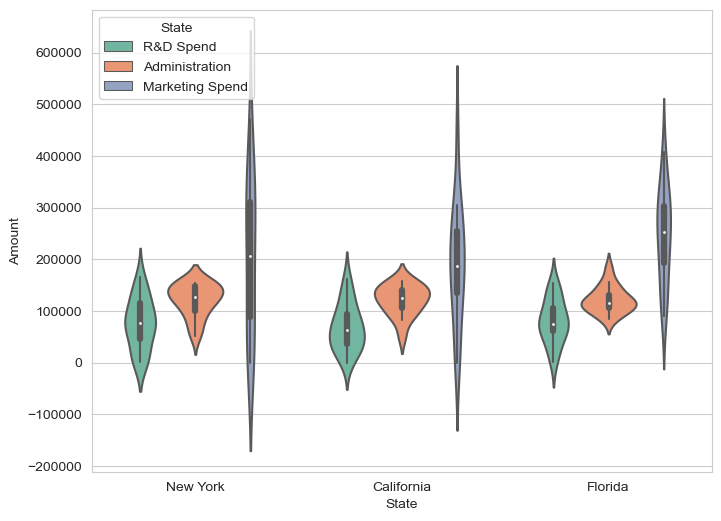

In [411]:
# plot violinplot
plt.figure(figsize=(8, 6))
sns.violinplot(data=data_melted, x="State", y="Amount", hue="Expense", palette='Set2')
plt.legend(title='State', loc='upper left')
plt.show()

In [412]:
# Extract year from the date column
df['Year'] = pd.to_datetime(df['date']).dt.year

# Group profit by year and state 
state_df = df.groupby(['Year','State'])['Profit'].mean().reset_index()
state_df

,Year,State,Profit
0,2018,California,160483.482500
1,2018,Florida,164778.220000
2,2018,New York,171091.677500
3,2019,California,126591.436667
4,2019,Florida,123508.262000
5,2019,New York,122344.322500
6,2020,California,100514.993333
7,2020,Florida,101433.107500
8,2020,New York,101705.612000
9,2021,California,71408.893333


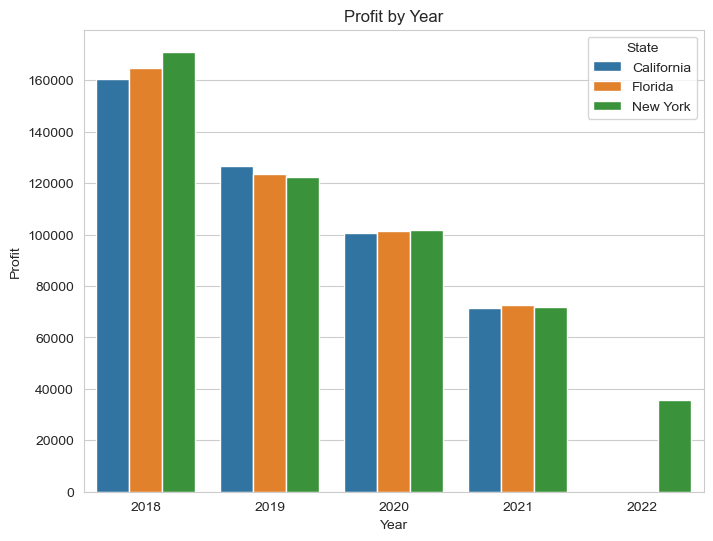

In [413]:
# Barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=state_df, x='Year', y='Profit', hue='State')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit by Year')
plt.legend(title='State', loc='upper right')
plt.show()

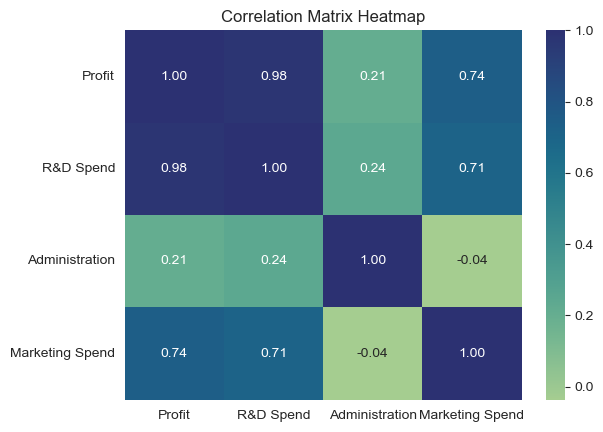

In [414]:
# Heatmap to visualize the correlation matrix
corr = df[['Profit','R&D Spend','Administration','Marketing Spend']].corr()
sns.heatmap(corr, annot=True, cmap='crest', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

* There is a strong positive correlation observed between 'R&D Spend' and 'Profit'. Meaning as the investment in R&D increases, the profit also tends to increase significantly.

* Also noticed a strong positive correlations between 'Marketing Spend' and 'R&D Spend,' as well as 'R&D Spend' and 'Profit.' Meaning there might be a relationship between the amount spent on marketing activities and the investment in R&D . Moreover, it implies that higher R&D investments might lead to increased marketing expenditures, which, in turn, could contribute to higher profits.

# Machine Learning

In [415]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [416]:
# Separate Features and Target
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [417]:
# Create and Train the Model
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [418]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [419]:
# Retrieve Feature Importances
feature_importances = model.feature_importances_


In [420]:
# Print the result 
print('Feature Importances:',feature_importances)

Feature Importances: [0.92373657 0.01048476 0.06577868]


* R&D Spend: The "R&D Spend" feature has a very high importance value of approximately 0.92. This means that the amount of money a startup spends on Research and Development plays a significant role in determining its profit. A higher value for this feature is associated with higher predicted profits.

* Administration: On the other hand, the "Administration" feature has a very low importance value of around 0.009. This suggests that the money spent on administrative expenses has very little influence on predicting the profit. It seems that this feature has a minimal impact on the overall prediction.

* Marketing Spend: The "Marketing Spend" feature has an importance value of about 0.063, which is higher than the "Administration" but much lower than the "R&D Spend." This indicates that marketing expenses also play a role in determining a startup's profit, but it is not as significant as the R&D expenses.

* In summary, the most critical factor affecting profit predictions is the amount of money spent on Research and Development (R&D Spend), while administrative expenses have very little impact. Marketing expenses are somewhat important, but they are not as influential as R&D spend in making profit predictions.

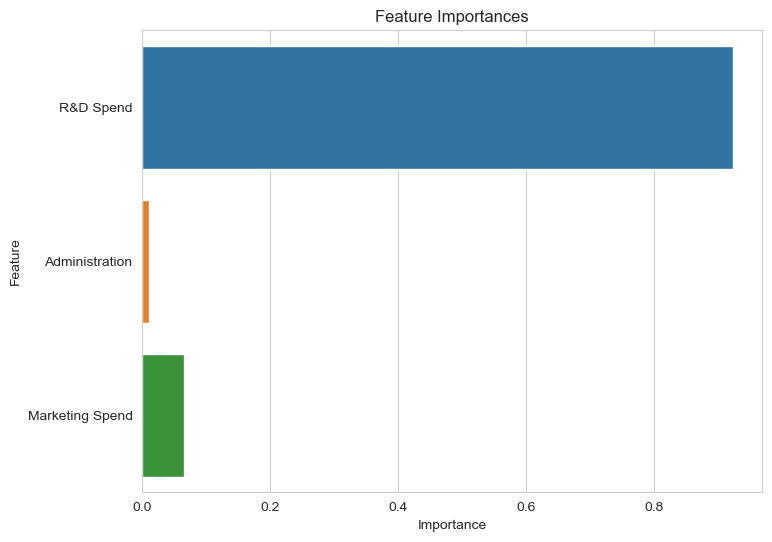

In [421]:
# Visualize Feature Importances
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [422]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 10112262.126705922


### For linear regression model

In [423]:
# Create a Linear Regression model instance
lm = LinearRegression()

# Train the model on the training data
lm.fit(X_train, y_train)

LinearRegression()

In [424]:
lm.intercept_

51630.15500855011

In [425]:
pd.DataFrame(lm.coef_,index=X.columns,columns=["Coefficients"]) 

,Coefficients
R&D Spend,0.774763
Administration,-0.039554
Marketing Spend,0.038184


In [426]:
# Make predictions on the test set
y_predicted = lm.predict(X_test)

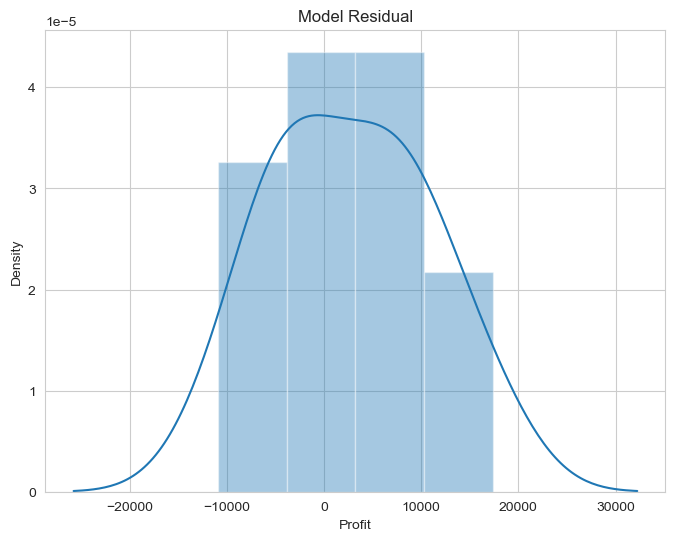

In [427]:
# Calculate residual
residual = y_test-y_predicted
# Plot residual
plt.figure(figsize=(8, 6))
sns.distplot(residual)
plt.title('Model Residual')
plt.show()

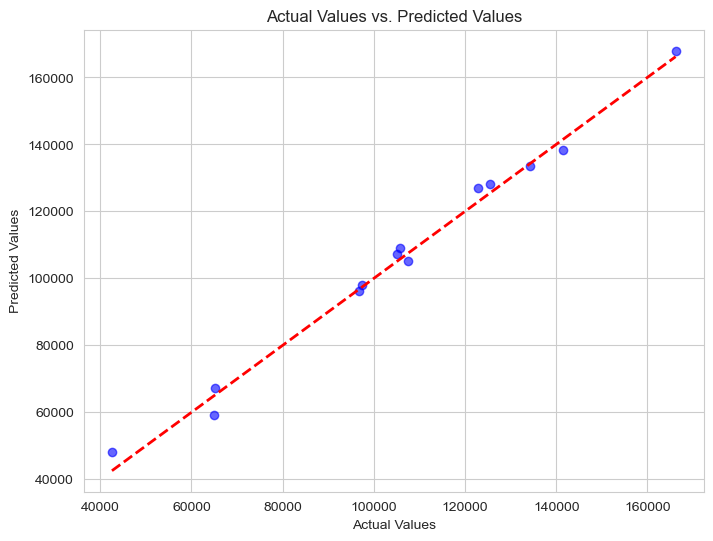

In [428]:
# Plot y_test against y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs. Predicted Values')
plt.show()

In [429]:
# Model Accuracy
train=lm.score(X_train,y_train)
test=lm.score(X_test,y_test)
print("Traning accuracy",train)
print("Testing accuracy",test)

Traning accuracy 0.9650197585709105
Testing accuracy 0.9341582772336136


In [430]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 70321366.10771702
Mean Absolute Error (MAE): 7088.266821507618
R-squared (R2): 0.9341582772336136


Both Linear Regression and Random Forest Regressor model shows high accuracy.